# LKM 2 - Dasar Deep Learning: Neuron Tunggal

## Tujuan Pembelajaran
- Memahami konsep dasar neuron tunggal
- Mengimplementasikan fungsi aktivasi sigmoid
- Menganalisis pengaruh bias pada output neuron
- Visualisasi hasil perhitungan neuron

In [1]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Library berhasil diimport!")

✅ Library berhasil diimport!


## 1. Implementasi Neuron Tunggal

Neuron tunggal adalah unit dasar dalam neural network yang menerima input, mengalikannya dengan bobot (weight), menambahkan bias, dan mengaplikasikan fungsi aktivasi.

**Formula:**
- $z = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + b$
- $a = f(z)$ dimana $f$ adalah fungsi aktivasi

In [2]:
# Implementasi sesuai dengan LKM
# Input
x = np.array([2, 3])  # dua fitur input
w = np.array([0.5, -0.4])  # bobot
b = 0.1  # bias

# Fungsi aktivasi sigmoid
def sigmoid(z):
    """Fungsi aktivasi sigmoid"""
    return 1 / (1 + np.exp(-z))

# Hitung output neuron
z = np.dot(x, w) + b
a = sigmoid(z)

print("=== HASIL NEURON TUNGGAL ===")
print(f"Input (x): {x}")
print(f"Bobot (w): {w}")
print(f"Bias (b): {b}")
print(f"\nKombinasi linear (z): {z:.4f}")
print(f"Output setelah sigmoid (a): {a:.4f}")
print(f"\nInterpretasi: Output {a:.4f} dapat diinterpretasikan sebagai probabilitas {a*100:.2f}%")

=== HASIL NEURON TUNGGAL ===
Input (x): [2 3]
Bobot (w): [ 0.5 -0.4]
Bias (b): 0.1

Kombinasi linear (z): -0.1000
Output setelah sigmoid (a): 0.4750

Interpretasi: Output 0.4750 dapat diinterpretasikan sebagai probabilitas 47.50%


## 2. Analisis Pengaruh Bias

Mari kita analisis apa yang terjadi ketika bias dihilangkan atau diubah nilainya.

=== ANALISIS PENGARUH BIAS ===
Bias     z        sigmoid(z)   Interpretasi        
--------------------------------------------------
0        -0.2000  0.4502       Prediksi: Negatif   
0.1      -0.1000  0.4750       Prediksi: Negatif   
0.5      0.3000   0.5744       Prediksi: Positif   
1.0      0.8000   0.6900       Prediksi: Positif   
-0.5     -0.7000  0.3318       Prediksi: Negatif   
-1.0     -1.2000  0.2315       Prediksi: Negatif   


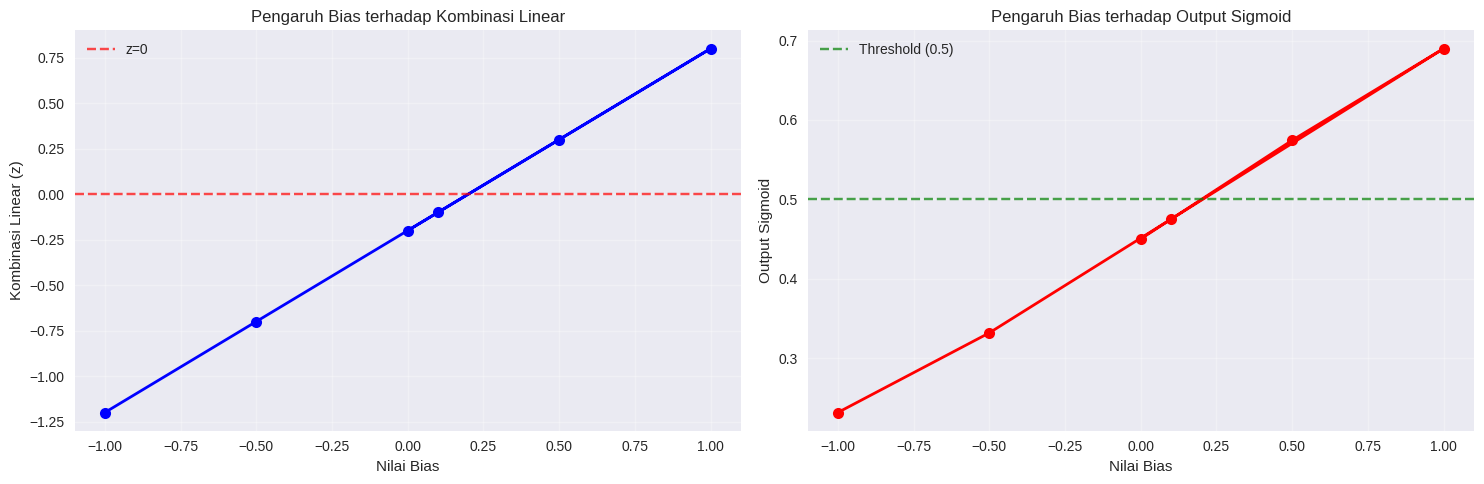


📊 Kesimpulan:
- Bias menggeser fungsi aktivasi secara horizontal
- Bias positif membuat neuron lebih mudah 'aktif' (output > 0.5)
- Bias negatif membuat neuron lebih sulit 'aktif'
- Tanpa bias, output hanya bergantung pada kombinasi linear input dan bobot


In [3]:
# Eksperimen dengan berbagai nilai bias
bias_values = [0, 0.1, 0.5, 1.0, -0.5, -1.0]
results = []

print("=== ANALISIS PENGARUH BIAS ===")
print(f"{'Bias':<8} {'z':<8} {'sigmoid(z)':<12} {'Interpretasi':<20}")
print("-" * 50)

for bias in bias_values:
    z_val = np.dot(x, w) + bias
    a_val = sigmoid(z_val)
    
    if a_val > 0.5:
        interpretation = "Prediksi: Positif"
    else:
        interpretation = "Prediksi: Negatif"
    
    results.append((bias, z_val, a_val))
    print(f"{bias:<8} {z_val:<8.4f} {a_val:<12.4f} {interpretation:<20}")

# Visualisasi pengaruh bias
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Nilai z vs bias
biases = [r[0] for r in results]
z_values = [r[1] for r in results]
a_values = [r[2] for r in results]

ax1.plot(biases, z_values, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Nilai Bias')
ax1.set_ylabel('Kombinasi Linear (z)')
ax1.set_title('Pengaruh Bias terhadap Kombinasi Linear')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.7, label='z=0')
ax1.legend()

# Plot 2: Output sigmoid vs bias
ax2.plot(biases, a_values, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Nilai Bias')
ax2.set_ylabel('Output Sigmoid')
ax2.set_title('Pengaruh Bias terhadap Output Sigmoid')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.5, color='g', linestyle='--', alpha=0.7, label='Threshold (0.5)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n📊 Kesimpulan:")
print("- Bias menggeser fungsi aktivasi secara horizontal")
print("- Bias positif membuat neuron lebih mudah 'aktif' (output > 0.5)")
print("- Bias negatif membuat neuron lebih sulit 'aktif'")
print("- Tanpa bias, output hanya bergantung pada kombinasi linear input dan bobot")

## 3. Visualisasi Fungsi Sigmoid

Mari kita visualisasi fungsi sigmoid untuk memahami karakteristiknya.

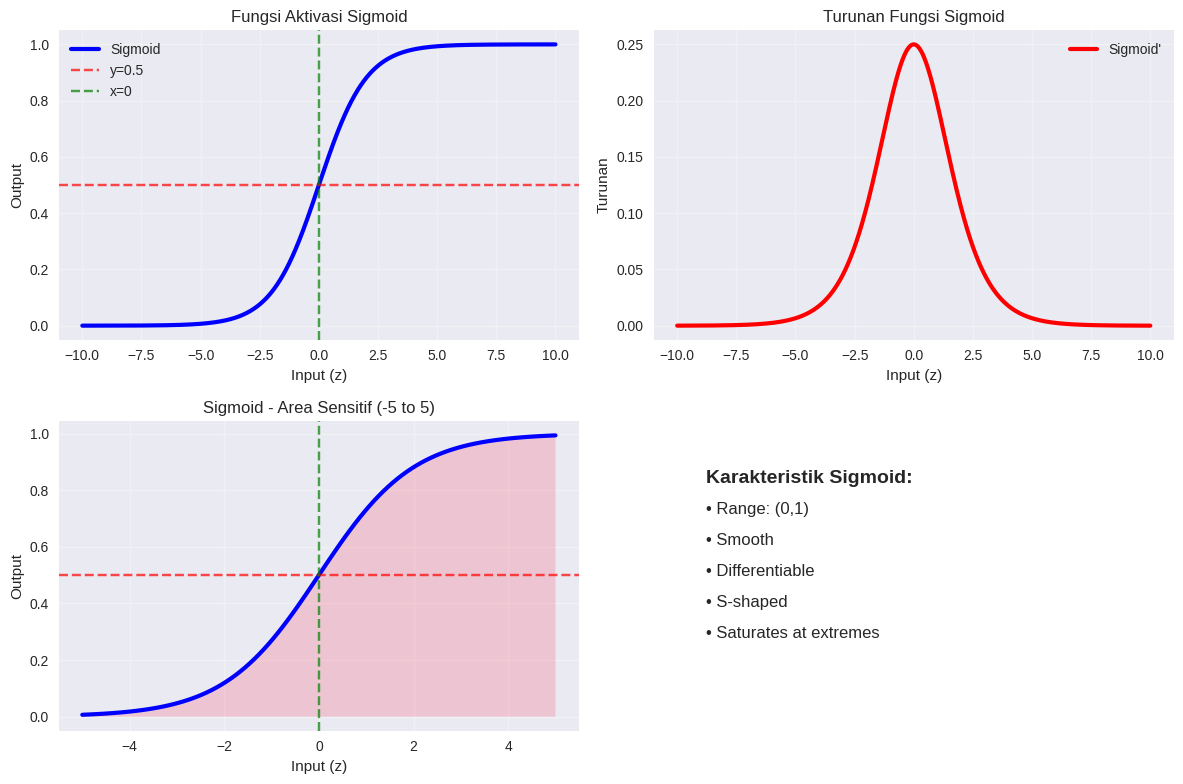

📈 Analisis Fungsi Sigmoid:
- Range output: (0, 1) - cocok untuk probabilitas
- Titik infleksi di z=0, σ(0) = 0.5
- Saturasi: σ(-∞) ≈ 0, σ(+∞) ≈ 1
- Turunan maksimum di z=0: σ'(0) = 0.25
- Smooth dan differentiable di semua titik


In [4]:
# Visualisasi fungsi sigmoid
z_range = np.linspace(-10, 10, 1000)
sigmoid_output = sigmoid(z_range)

plt.figure(figsize=(12, 8))

# Plot fungsi sigmoid
plt.subplot(2, 2, 1)
plt.plot(z_range, sigmoid_output, 'b-', linewidth=3, label='Sigmoid')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='y=0.5')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.7, label='x=0')
plt.xlabel('Input (z)')
plt.ylabel('Output')
plt.title('Fungsi Aktivasi Sigmoid')
plt.grid(True, alpha=0.3)
plt.legend()

# Plot turunan sigmoid
sigmoid_derivative = sigmoid_output * (1 - sigmoid_output)
plt.subplot(2, 2, 2)
plt.plot(z_range, sigmoid_derivative, 'r-', linewidth=3, label="Sigmoid'")
plt.xlabel('Input (z)')
plt.ylabel('Turunan')
plt.title('Turunan Fungsi Sigmoid')
plt.grid(True, alpha=0.3)
plt.legend()

# Highlight area of interest
plt.subplot(2, 2, 3)
z_zoom = np.linspace(-5, 5, 100)
sigmoid_zoom = sigmoid(z_zoom)
plt.plot(z_zoom, sigmoid_zoom, 'b-', linewidth=3)
plt.fill_between(z_zoom, sigmoid_zoom, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='g', linestyle='--', alpha=0.7)
plt.xlabel('Input (z)')
plt.ylabel('Output')
plt.title('Sigmoid - Area Sensitif (-5 to 5)')
plt.grid(True, alpha=0.3)

# Karakteristik sigmoid
plt.subplot(2, 2, 4)
characteristics = ['Range: (0,1)', 'Smooth', 'Differentiable', 'S-shaped', 'Saturates at extremes']
plt.text(0.1, 0.8, 'Karakteristik Sigmoid:', fontsize=14, fontweight='bold')
for i, char in enumerate(characteristics):
    plt.text(0.1, 0.7 - i*0.1, f'• {char}', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.tight_layout()
plt.show()

print("📈 Analisis Fungsi Sigmoid:")
print(f"- Range output: (0, 1) - cocok untuk probabilitas")
print(f"- Titik infleksi di z=0, σ(0) = 0.5")
print(f"- Saturasi: σ(-∞) ≈ 0, σ(+∞) ≈ 1")
print(f"- Turunan maksimum di z=0: σ'(0) = 0.25")
print(f"- Smooth dan differentiable di semua titik")

## 4. Neuron dengan Multiple Inputs

Mari kita buat implementasi yang lebih general untuk neuron dengan input berjumlah variable.

In [5]:
class SingleNeuron:
    """Implementasi neuron tunggal dengan berbagai fungsi aktivasi"""
    
    def __init__(self, input_size, activation='sigmoid'):
        """
        Initialize neuron
        
        Args:
            input_size: jumlah input features
            activation: fungsi aktivasi ('sigmoid', 'tanh', 'relu')
        """
        self.input_size = input_size
        self.activation = activation
        
        # Inisialisasi bobot dan bias secara random
        np.random.seed(42)  # untuk reproducibility
        self.weights = np.random.normal(0, 0.5, input_size)
        self.bias = np.random.normal(0, 0.1)
        
        print(f"Neuron dibuat dengan {input_size} input, aktivasi: {activation}")
        print(f"Bobot awal: {self.weights}")
        print(f"Bias awal: {self.bias:.4f}")
    
    def forward(self, x):
        """Forward pass neuron"""
        # Kombinasi linear
        z = np.dot(x, self.weights) + self.bias
        
        # Aplikasi fungsi aktivasi
        if self.activation == 'sigmoid':
            a = self._sigmoid(z)
        elif self.activation == 'tanh':
            a = np.tanh(z)
        elif self.activation == 'relu':
            a = np.maximum(0, z)
        else:
            a = z  # linear activation
        
        return z, a
    
    def _sigmoid(self, z):
        """Fungsi sigmoid dengan numerical stability"""
        return np.where(z >= 0, 
                       1 / (1 + np.exp(-z)), 
                       np.exp(z) / (1 + np.exp(z)))
    
    def set_parameters(self, weights, bias):
        """Set bobot dan bias manual"""
        self.weights = np.array(weights)
        self.bias = bias
        print(f"Parameter diupdate - Bobot: {self.weights}, Bias: {self.bias}")

# Test dengan contoh dari LKM
neuron = SingleNeuron(input_size=2, activation='sigmoid')
neuron.set_parameters([0.5, -0.4], 0.1)

# Test dengan input dari LKM
x_test = np.array([2, 3])
z, a = neuron.forward(x_test)

print("\n=== TEST DENGAN DATA LKM ===")
print(f"Input: {x_test}")
print(f"z (kombinasi linear): {z:.4f}")
print(f"Output setelah sigmoid: {a:.4f}")

# Test dengan berbagai input
test_inputs = [
    [0, 0],
    [1, 0], 
    [0, 1],
    [1, 1],
    [2, 3],
    [-1, 2],
    [5, -2]
]

print("\n=== TEST DENGAN BERBAGAI INPUT ===")
print(f"{'Input':<12} {'z':<8} {'Output':<8} {'Prediksi':<10}")
print("-" * 40)

for inp in test_inputs:
    z, a = neuron.forward(np.array(inp))
    pred = "Positif" if a > 0.5 else "Negatif"
    print(f"{str(inp):<12} {z:<8.3f} {a:<8.3f} {pred:<10}")

Neuron dibuat dengan 2 input, aktivasi: sigmoid
Bobot awal: [ 0.24835708 -0.06913215]
Bias awal: 0.0648
Parameter diupdate - Bobot: [ 0.5 -0.4], Bias: 0.1

=== TEST DENGAN DATA LKM ===
Input: [2 3]
z (kombinasi linear): -0.1000
Output setelah sigmoid: 0.4750

=== TEST DENGAN BERBAGAI INPUT ===
Input        z        Output   Prediksi  
----------------------------------------
[0, 0]       0.100    0.525    Positif   
[1, 0]       0.600    0.646    Positif   
[0, 1]       -0.300   0.426    Negatif   
[1, 1]       0.200    0.550    Positif   
[2, 3]       -0.100   0.475    Negatif   
[-1, 2]      -1.200   0.231    Negatif   
[5, -2]      3.400    0.968    Positif   


## 5. Visualisasi Decision Boundary

Mari kita visualisasi bagaimana neuron memisahkan ruang input (decision boundary).

In [ ]:
# Visualisasi decision boundary
def plot_decision_boundary(neuron, x_range=(-3, 6), y_range=(-2, 5)):
    """Plot decision boundary untuk neuron 2D"""
    
    # Buat grid
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_range[0], x_range[1], h),
                        np.arange(y_range[0], y_range[1], h))
    
    # Prediksi untuk setiap titik di grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = []
    
    for point in grid_points:
        _, output = neuron.forward(point)
        predictions.append(output)
    
    predictions = np.array(predictions).reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Contour plot
    plt.subplot(1, 2, 1)
    contour = plt.contourf(xx, yy, predictions, levels=50, alpha=0.7, cmap='RdYlBu')
    plt.colorbar(contour, label='Output Probability')
    
    # Decision boundary (output = 0.5)
    plt.contour(xx, yy, predictions, levels=[0.5], colors='black', linewidths=3, linestyles='--')
    
    # Plot test points
    for inp in test_inputs:
        _, output = neuron.forward(np.array(inp))
        color = 'red' if output > 0.5 else 'blue'
        marker = 'o' if output > 0.5 else 'x'
        plt.scatter(inp[0], inp[1], c=color, marker=marker, s=100, edgecolor='black')
        plt.annotate(f'{output:.2f}', (inp[0], inp[1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary dan Output Probability')
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: 3D surface
    ax = plt.subplot(1, 2, 2, projection='3d')
    surf = ax.plot_surface(xx, yy, predictions, cmap='RdYlBu', alpha=0.7)
    
    # Plot test points in 3D
    for inp in test_inputs:
        _, output = neuron.forward(np.array(inp))
        color = 'red' if output > 0.5 else 'blue'
        ax.scatter(inp[0], inp[1], output, c=color, s=50)
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Output')
    ax.set_title('3D Surface Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Analisis decision boundary
    w1, w2 = neuron.weights
    b = neuron.bias
    
    print("\n🔍 Analisis Decision Boundary:")
    print(f"Persamaan garis: {w1:.3f}*x1 + {w2:.3f}*x2 + {b:.3f} = 0")
    
    if w2 != 0:
        print(f"Dalam bentuk y = mx + c: x2 = {-w1/w2:.3f}*x1 + {-b/w2:.3f}")
        slope = -w1/w2
        intercept = -b/w2
        print(f"Slope: {slope:.3f}, Y-intercept: {intercept:.3f}")

# Plot decision boundary
plot_decision_boundary(neuron)

## 6. Kesimpulan dan Analisis

Berdasarkan eksperimen yang telah dilakukan, berikut adalah kesimpulan tentang neuron tunggal:

In [ ]:
# Summary dan insights
print("="*60)
print("          KESIMPULAN NEURON TUNGGAL")
print("="*60)

insights = [
    "1. PERAN BIAS:",
    "   • Bias menggeser decision boundary",
    "   • Bias positif: neuron lebih mudah aktif", 
    "   • Bias negatif: neuron lebih sulit aktif",
    "   • Tanpa bias: decision boundary melewati origin",
    "",
    "2. FUNGSI SIGMOID:",
    "   • Range output: (0, 1) - ideal untuk probabilitas",
    "   • Smooth dan differentiable - baik untuk gradient descent",
    "   • Saturasi di ekstrem - dapat menyebabkan vanishing gradient",
    "   • S-shaped curve - transisi halus dari 0 ke 1",
    "",
    "3. DECISION BOUNDARY:",
    "   • Neuron tunggal hanya bisa memisahkan data linear",
    "   • Decision boundary berupa garis lurus (2D) atau hyperplane (nD)",
    "   • Tidak bisa menyelesaikan masalah non-linear seperti XOR",
    "",
    "4. LIMITASI:",
    "   • Hanya untuk klasifikasi linear separable",
    "   • Tidak dapat mempelajari pola kompleks",
    "   • Membutuhkan multiple layers untuk non-linearity",
    "",
    "5. APLIKASI:",
    "   • Binary classification sederhana",
    "   • Logistic regression",
    "   • Building block untuk neural networks"
]

for insight in insights:
    print(insight)

print("\n" + "="*60)
print("Neuron tunggal adalah fondasi dari neural networks modern!")
print("="*60)